In [ ]:
import pandas as pd

# Load the data again to be safe
csv_file_path = "/content/sample_data/Bangladesh.csv"
df = pd.read_csv(csv_file_path)
df_bangladesh = df[df['Country Name'] == 'Bangladesh']

# Get the unique indicator codes
available_indicators = df_bangladesh['Indicator Code'].unique()
print(available_indicators)

['fin37.38.t.d.2' 'SG.MHG.UMDP.ZS' 'SP.POP.7074.MA' 'SE.PRM.CMPT.MA.ZS'
 'SL.EMP.MPYR.FE.ZS' 'SH.STA.AIRP.FE.P5' 'fin37.38.t.d.1'
 'SH.STA.STNT.ME.ZS' 'SH.DTH.COMM.60UP.MA.ZS' 'SL.TLF.BASC.FE.ZS'
 'SP.POP.3034.FE' 'SH.HIV.1524.KW.MA.ZS' 'SL.UEM.1524.MA.NE.ZS'
 'UIS.FEP.3.V' 'HD.HCI.OVRL.MA' 'SE.PRM.CMPL.ZS' 'SH.DTH.INJR.1559.FE.ZS'
 'fin20.t.d' 'fin45.1M.d.2' 'SG.LAW.INDX.MR' 'SH.PRV.SMOK.FE'
 'SP.POP.AG03.FE.IN' 'SG.LAW.INDX.MO' 'fin22a.2014' 'SE.PRM.NENR.MA'
 'UIS.LP.AG15T24.F' 'fin45.1M.d.1' 'fin2.t.d' 'SG.APL.PSPT.EQ'
 'mobileaccount.t.d' 'SG.DMK.PRCH.WF.ZS' 'SH.DTH.NCOM.60UP.ZS'
 'UIS.LP.AG15T24.M' 'SE.SEC.CMPT.LO.FE.ZS' 'SE.PRM.NINT.MA.ZS'
 'SG.VAW.NEGL.ZS' 'fin24a.32.d' 'SP.POP.AG00.MA.IN' 'SH.PAR.LEVE.AL'
 'SH.DTH.NCOM.0004.MA.ZS' 'SH.DTH.NCOM.1559.FE.ZS' 'SE.TER.GRAD.FE.SV.ZS'
 'g20.t.d' 'SH.STA.ANV4.ZS' 'SE.TER.GRAD.FE.AG.ZS' 'SL.UEM.ADVN.FE.ZS'
 'fin24a.1.d' 'fin44d2.d' 'UIS.ROFST.3.M.CP' 'SG.LOC.LIVE.EQ'
 'SH.SVR.WAST.ZS' 'SL.EMP.SMGT.FE.ZS' 'SH.STA.TRAF.FE.P5'
 'SH.STA.SUI

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Set working directory for Google Colab
os.chdir('/content')
csv_file_path = "sample_data/Bangladesh.csv"

# ✅ Load data
try:
    df = pd.read_csv(csv_file_path)
    df_bangladesh = df[df['Country Name'] == 'Bangladesh'].copy()
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found.")
    exit()

# ✅ Indicators of interest
indicator_codes = [
    "SE.ADT.LITR.FE.ZS", "SE.ADT.LITR.MA.ZS",   # Literacy
    "SE.SEC.ENRR.FE", "SE.SEC.ENRR.MA",         # Secondary enrollment
    "SE.TER.ENRR.FE", "SE.TER.ENRR.MA",         # Tertiary enrollment
    "SL.TLF.CACT.FE.ZS", "SL.TLF.CACT.MA.ZS",   # Labor force participation
    "SL.EMP.WORK.FE.ZS", "SL.EMP.WORK.MA.ZS",   # Employment to population
    "SL.AGR.EMPL.FE.ZS", "SL.AGR.EMPL.MA.ZS",   # Agriculture employment
    "SL.UEM.TOTL.FE.ZS", "SL.UEM.TOTL.MA.ZS",   # Unemployment
    "IC.FRM.FEMO.ZS", "IC.FRM.BNKS.ZS",          # Business indicators
    "SP.DYN.LE00.MA.IN", "SP.DYN.LE00.FE.IN",   # Life expectancy
    "SG.GEN.PARL.ZS",                          # Political participation
    "SL.EMP.VULN.FE.ZS", "SL.EMP.VULN.MA.ZS",    # Vulnerable employment
    "SH.STA.MMRT",                              # Maternal mortality ratio
    "SE.PRM.CMPT.MA.ZS", "SE.PRM.CMPT.FE.ZS",    # Primary completion rate
    "SE.SEC.CMPT.LO.FE.ZS", "SE.SEC.CMPT.LO.MA.ZS", # Lower secondary completion
    "SE.TER.CMPL.FE.ZS", "SE.TER.CMPL.MA.ZS",    # Tertiary completion rate
    "IT.NET.USER.MA.ZS", "IT.NET.USER.FE.ZS"     # Internet users
]

# ✅ Filter data for selected indicators
df_filtered = df_bangladesh[df_bangladesh["Indicator Code"].isin(indicator_codes)].copy()

# ✅ Pivot the table
try:
    df_pivot = df_filtered.pivot(index="Year", columns="Indicator Code", values="Value") # Removed .dropna()
except ValueError:
    print("Error during pivoting. Please check if there are duplicate Year-Indicator Code combinations.")
    print(df_filtered[['Year', 'Indicator Code']].value_counts().head())
    df_pivot = pd.DataFrame() # Create an empty DataFrame to avoid further errors

# ✅ Compute gender gaps
if not df_pivot.empty:
    if "SE.ADT.LITR.MA.ZS" in df_pivot.columns and "SE.ADT.LITR.FE.ZS" in df_pivot.columns:
        df_pivot["literacy_gap"] = df_pivot["SE.ADT.LITR.MA.ZS"] - df_pivot["SE.ADT.LITR.FE.ZS"]
    if "SE.SEC.ENRR.MA" in df_pivot.columns and "SE.SEC.ENRR.FE" in df_pivot.columns:
        df_pivot["sec_enroll_gap"] = df_pivot["SE.SEC.ENRR.MA"] - df_pivot["SE.SEC.ENRR.FE"]
    if "SE.TER.ENRR.MA" in df_pivot.columns and "SE.TER.ENRR.FE" in df_pivot.columns:
        df_pivot["ter_enroll_gap"] = df_pivot["SE.TER.ENRR.MA"] - df_pivot["SE.TER.ENRR.FE"]
    if "SL.TLF.CACT.MA.ZS" in df_pivot.columns and "SL.TLF.CACT.FE.ZS" in df_pivot.columns:
        df_pivot["labor_gap"] = df_pivot["SL.TLF.CACT.MA.ZS"] - df_pivot["SL.TLF.CACT.FE.ZS"]
    if "SL.EMP.WORK.MA.ZS" in df_pivot.columns and "SL.EMP.WORK.FE.ZS" in df_pivot.columns:
        df_pivot["employment_gap"] = df_pivot["SL.EMP.WORK.MA.ZS"] - df_pivot["SL.EMP.WORK.FE.ZS"]
    if "SL.AGR.EMPL.MA.ZS" in df_pivot.columns and "SL.AGR.EMPL.FE.ZS" in df_pivot.columns:
        df_pivot["agri_gap"] = df_pivot["SL.AGR.EMPL.MA.ZS"] - df_pivot["SL.AGR.EMPL.FE.ZS"]
    if "SL.UEM.TOTL.MA.ZS" in df_pivot.columns and "SL.UEM.TOTL.FE.ZS" in df_pivot.columns:
        df_pivot["unemployment_gap"] = df_pivot["SL.UEM.TOTL.MA.ZS"] - df_pivot["SL.UEM.TOTL.FE.ZS"]
    if "SP.DYN.LE00.MA.IN" in df_pivot.columns and "SP.DYN.LE00.FE.IN" in df_pivot.columns:
        df_pivot["life_expectancy_gap"] = df_pivot["SP.DYN.LE00.MA.IN"] - df_pivot["SP.DYN.LE00.FE.IN"]
    if "SL.EMP.VULN.MA.ZS" in df_pivot.columns and "SL.EMP.VULN.FE.ZS" in df_pivot.columns:
        df_pivot["vulnerable_employment_gap"] = df_pivot["SL.EMP.VULN.MA.ZS"] - df_pivot["SL.EMP.VULN.FE.ZS"]
    if "SE.PRM.CMPT.MA.ZS" in df_pivot.columns and "SE.PRM.CMPT.FE.ZS" in df_pivot.columns:
        df_pivot["primary_completion_gap"] = df_pivot["SE.PRM.CMPT.MA.ZS"] - df_pivot["SE.PRM.CMPT.FE.ZS"]
    if "SE.SEC.CMPT.LO.MA.ZS" in df_pivot.columns and "SE.SEC.CMPT.LO.FE.ZS" in df_pivot.columns:
        df_pivot["lower_secondary_completion_gap"] = df_pivot["SE.SEC.CMPT.LO.MA.ZS"] - df_pivot["SE.SEC.CMPT.LO.FE.ZS"]
    if "SE.TER.CMPL.MA.ZS" in df_pivot.columns and "SE.TER.CMPL.FE.ZS" in df_pivot.columns:
        df_pivot["tertiary_completion_gap"] = df_pivot["SE.TER.CMPL.MA.ZS"] - df_pivot["SE.TER.CMPL.FE.ZS"]
    if "IT.NET.USER.MA.ZS" in df_pivot.columns and "IT.NET.USER.FE.ZS" in df_pivot.columns:
        df_pivot["internet_users_gap"] = df_pivot["IT.NET.USER.MA.ZS"] - df_pivot["IT.NET.USER.FE.ZS"]

    print("Shape of df_filtered:", df_filtered.shape)
    print("Shape of df_pivot:", df_pivot.shape)
    print("\nFirst few rows of df_pivot:")
    print(df_pivot.head())
    print("\nColumns of df_pivot:")
    print(df_pivot.columns)
else:
    print("df_pivot is empty. No plots will be generated.")

Shape of df_filtered: (783, 6)
Shape of df_pivot: (65, 42)

First few rows of df_pivot:
Indicator Code  IC.FRM.FEMO.ZS  IT.NET.USER.FE.ZS  IT.NET.USER.MA.ZS  \
Year                                                                   
1960                       NaN                NaN                NaN   
1961                       NaN                NaN                NaN   
1962                       NaN                NaN                NaN   
1963                       NaN                NaN                NaN   
1964                       NaN                NaN                NaN   

Indicator Code  SE.ADT.LITR.FE.ZS  SE.ADT.LITR.MA.ZS  SE.PRM.CMPT.FE.ZS  \
Year                                                                      
1960                          NaN                NaN                NaN   
1961                          NaN                NaN                NaN   
1962                          NaN                NaN                NaN   
1963                          Na

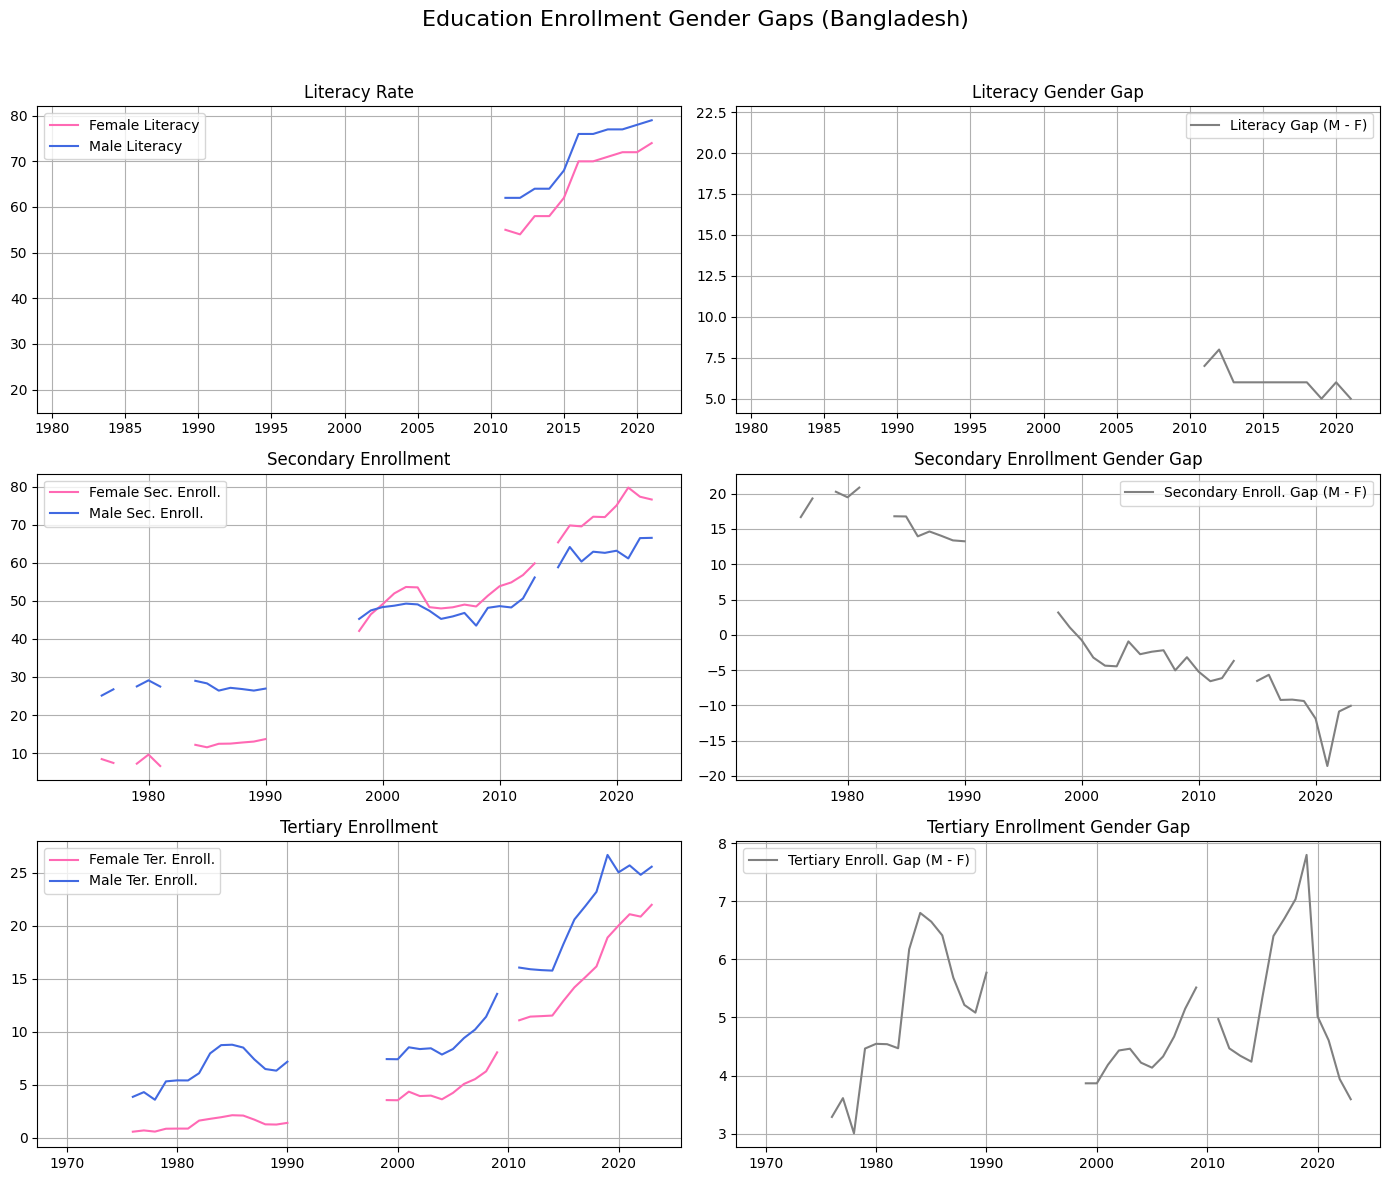

In [ ]:
# ✅ Plot Education Enrollment Gender Gaps
if not df_pivot.empty and (
    ("SE.ADT.LITR.FE.ZS" in df_pivot.columns and "SE.ADT.LITR.MA.ZS" in df_pivot.columns) or
    ("SE.SEC.ENRR.FE" in df_pivot.columns and "SE.SEC.ENRR.MA" in df_pivot.columns) or
    ("SE.TER.ENRR.FE" in df_pivot.columns and "SE.TER.ENRR.MA" in df_pivot.columns)
):
    fig_enroll, axs_enroll = plt.subplots(3, 2, figsize=(14, 12))
    fig_enroll.suptitle("Education Enrollment Gender Gaps (Bangladesh)", fontsize=16)

    # Literacy
    if "SE.ADT.LITR.FE.ZS" in df_pivot.columns and "SE.ADT.LITR.MA.ZS" in df_pivot.columns:
        axs_enroll[0, 0].plot(df_pivot.index, df_pivot["SE.ADT.LITR.FE.ZS"], label="Female Literacy", color="hotpink")
        axs_enroll[0, 0].plot(df_pivot.index, df_pivot["SE.ADT.LITR.MA.ZS"], label="Male Literacy", color="royalblue")
        axs_enroll[0, 0].set_title("Literacy Rate")
        axs_enroll[0, 0].legend()
        axs_enroll[0, 0].grid(True)
        if "literacy_gap" in df_pivot.columns:
            axs_enroll[0, 1].plot(df_pivot.index, df_pivot["literacy_gap"], label="Literacy Gap (M - F)", color="gray")
            axs_enroll[0, 1].set_title("Literacy Gender Gap")
            axs_enroll[0, 1].legend()
            axs_enroll[0, 1].grid(True)

    # Secondary Enrollment
    if "SE.SEC.ENRR.FE" in df_pivot.columns and "SE.SEC.ENRR.MA" in df_pivot.columns:
        axs_enroll[1, 0].plot(df_pivot.index, df_pivot["SE.SEC.ENRR.FE"], label="Female Sec. Enroll.", color="hotpink")
        axs_enroll[1, 0].plot(df_pivot.index, df_pivot["SE.SEC.ENRR.MA"], label="Male Sec. Enroll.", color="royalblue")
        axs_enroll[1, 0].set_title("Secondary Enrollment")
        axs_enroll[1, 0].legend()
        axs_enroll[1, 0].grid(True)
        if "sec_enroll_gap" in df_pivot.columns:
            axs_enroll[1, 1].plot(df_pivot.index, df_pivot["sec_enroll_gap"], label="Secondary Enroll. Gap (M - F)", color="gray")
            axs_enroll[1, 1].set_title("Secondary Enrollment Gender Gap")
            axs_enroll[1, 1].legend()
            axs_enroll[1, 1].grid(True)

    # Tertiary Enrollment
    if "SE.TER.ENRR.FE" in df_pivot.columns and "SE.TER.ENRR.MA" in df_pivot.columns:
        axs_enroll[2, 0].plot(df_pivot.index, df_pivot["SE.TER.ENRR.FE"], label="Female Ter. Enroll.", color="hotpink")
        axs_enroll[2, 0].plot(df_pivot.index, df_pivot["SE.TER.ENRR.MA"], label="Male Ter. Enroll.", color="royalblue")
        axs_enroll[2, 0].set_title("Tertiary Enrollment")
        axs_enroll[2, 0].legend()
        axs_enroll[2, 0].grid(True)
        if "ter_enroll_gap" in df_pivot.columns:
            axs_enroll[2, 1].plot(df_pivot.index, df_pivot["ter_enroll_gap"], label="Tertiary Enroll. Gap (M - F)", color="gray")
            axs_enroll[2, 1].set_title("Tertiary Enrollment Gender Gap")
            axs_enroll[2, 1].legend()
            axs_enroll[2, 1].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

## 📊 Education Enrollment and Gender Trends in Bangladesh

Over time, education in Bangladesh has improved for both men and women, but gender gaps still exist.

### 🔤 Literacy
Since the early 2010s, literacy rates have steadily increased.  
Men have consistently had higher literacy levels than women.  
The gap is slowly narrowing, but women still lag behind.

### 🏫 Secondary Education
From the late 1970s onward, enrollment in secondary school rose for both genders.  
Notably, since the early 2000s, more girls than boys have been enrolling.  
This shift marks a significant improvement in girls’ access to education.

### 🎓 Tertiary Education
University-level enrollment has grown for both men and women since the 1970s.  
However, men have generally maintained higher enrollment numbers.  
The gender gap remains and hasn’t closed consistently.

---

### ✅ Summary
Bangladesh has made real progress in education.  
Girls now outperform boys in secondary school enrollment — a major step forward.  
Still, women fall behind in literacy and higher education.  
These trends suggest that **social, economic, and cultural factors** continue to shape educational access and decisions.


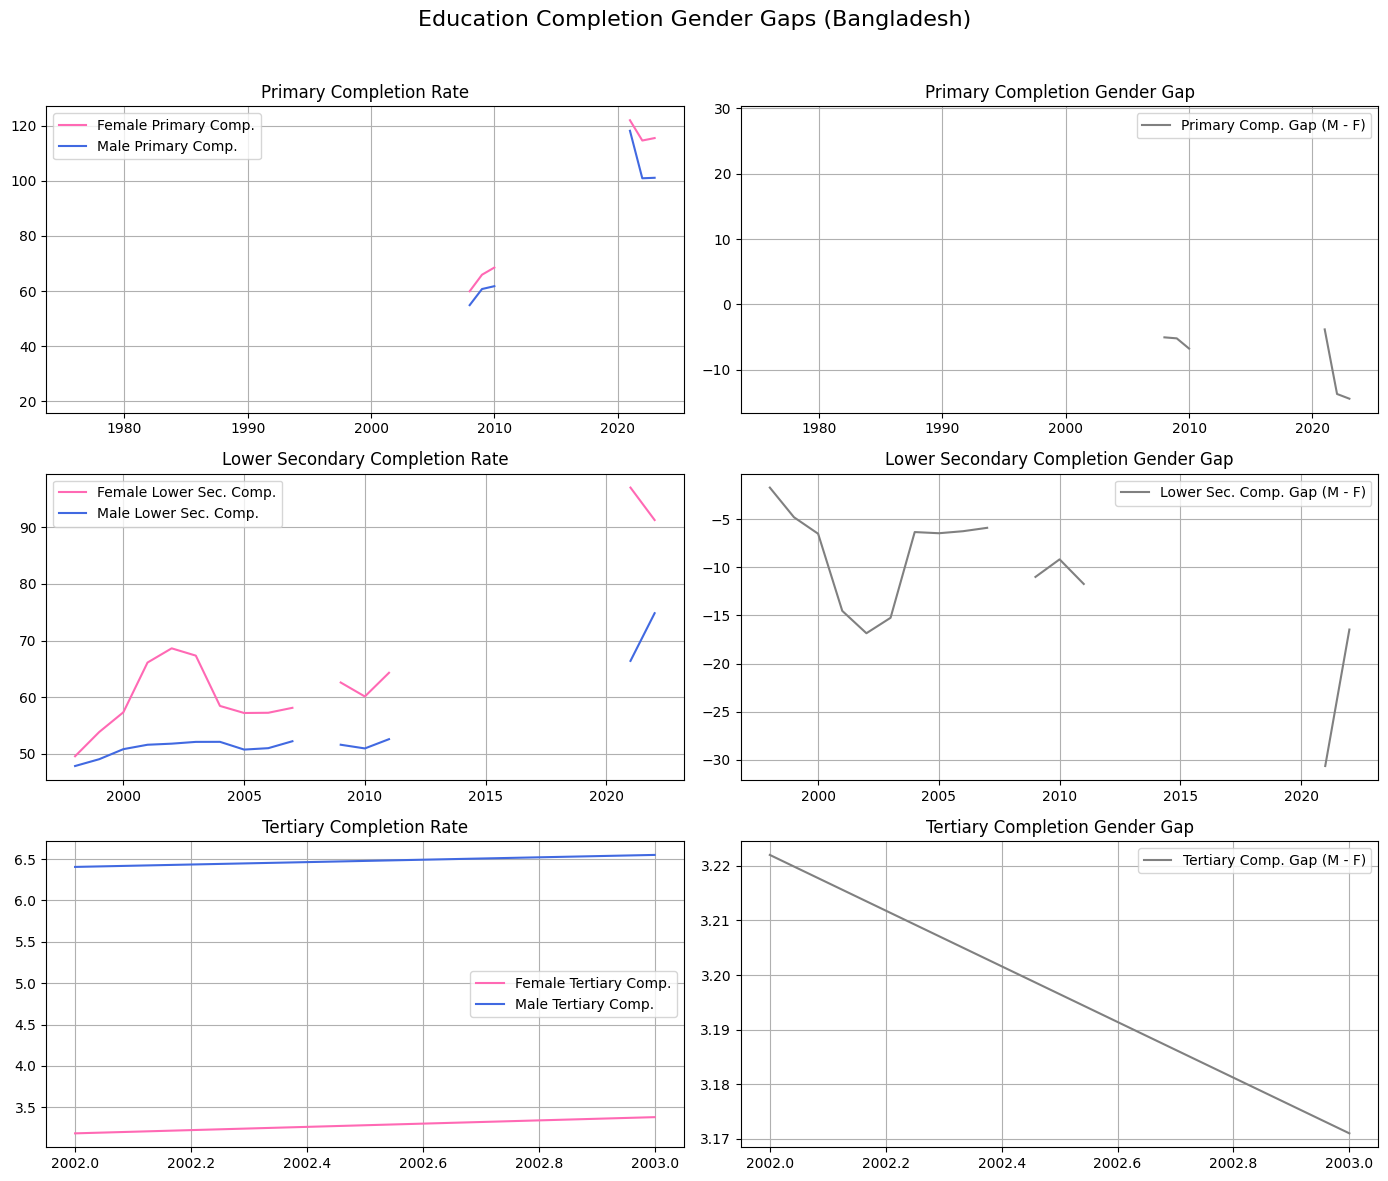

In [ ]:
# ✅ Plot Education Completion Gender Gaps
if not df_pivot.empty and (
    ("SE.PRM.CMPT.FE.ZS" in df_pivot.columns and "SE.PRM.CMPT.MA.ZS" in df_pivot.columns) or
    ("SE.SEC.CMPT.LO.FE.ZS" in df_pivot.columns and "SE.SEC.CMPT.LO.MA.ZS" in df_pivot.columns) or
    ("SE.TER.CMPL.FE.ZS" in df_pivot.columns and "SE.TER.CMPL.MA.ZS" in df_pivot.columns)
):
    fig_complete, axs_complete = plt.subplots(3, 2, figsize=(14, 12))
    fig_complete.suptitle("Education Completion Gender Gaps (Bangladesh)", fontsize=16)

    # Primary Completion
    if "SE.PRM.CMPT.FE.ZS" in df_pivot.columns and "SE.PRM.CMPT.MA.ZS" in df_pivot.columns:
        axs_complete[0, 0].plot(df_pivot.index, df_pivot["SE.PRM.CMPT.FE.ZS"], label="Female Primary Comp.", color="hotpink")
        axs_complete[0, 0].plot(df_pivot.index, df_pivot["SE.PRM.CMPT.MA.ZS"], label="Male Primary Comp.", color="royalblue")
        axs_complete[0, 0].set_title("Primary Completion Rate")
        axs_complete[0, 0].legend()
        axs_complete[0, 0].grid(True)
        if "primary_completion_gap" in df_pivot.columns:
            axs_complete[0, 1].plot(df_pivot.index, df_pivot["primary_completion_gap"], label="Primary Comp. Gap (M - F)", color="gray")
            axs_complete[0, 1].set_title("Primary Completion Gender Gap")
            axs_complete[0, 1].legend()
            axs_complete[0, 1].grid(True)

    # Lower Secondary Completion
    if "SE.SEC.CMPT.LO.FE.ZS" in df_pivot.columns and "SE.SEC.CMPT.LO.MA.ZS" in df_pivot.columns:
        axs_complete[1, 0].plot(df_pivot.index, df_pivot["SE.SEC.CMPT.LO.FE.ZS"], label="Female Lower Sec. Comp.", color="hotpink")
        axs_complete[1, 0].plot(df_pivot.index, df_pivot["SE.SEC.CMPT.LO.MA.ZS"], label="Male Lower Sec. Comp.", color="royalblue")
        axs_complete[1, 0].set_title("Lower Secondary Completion Rate")
        axs_complete[1, 0].legend()
        axs_complete[1, 0].grid(True)
        if "lower_secondary_completion_gap" in df_pivot.columns:
            axs_complete[1, 1].plot(df_pivot.index, df_pivot["lower_secondary_completion_gap"], label="Lower Sec. Comp. Gap (M - F)", color="gray")
            axs_complete[1, 1].set_title("Lower Secondary Completion Gender Gap")
            axs_complete[1, 1].legend()
            axs_complete[1, 1].grid(True)

    # Tertiary Completion
    if "SE.TER.CMPL.FE.ZS" in df_pivot.columns and "SE.TER.CMPL.MA.ZS" in df_pivot.columns:
        axs_complete[2, 0].plot(df_pivot.index, df_pivot["SE.TER.CMPL.FE.ZS"], label="Female Tertiary Comp.", color="hotpink")
        axs_complete[2, 0].plot(df_pivot.index, df_pivot["SE.TER.CMPL.MA.ZS"], label="Male Tertiary Comp.", color="royalblue")
        axs_complete[2, 0].set_title("Tertiary Completion Rate")
        axs_complete[2, 0].legend()
        axs_complete[2, 0].grid(True)
        if "tertiary_completion_gap" in df_pivot.columns:
            axs_complete[2, 1].plot(df_pivot.index, df_pivot["tertiary_completion_gap"], label="Tertiary Comp. Gap (M - F)", color="gray")
            axs_complete[2, 1].set_title("Tertiary Completion Gender Gap")
            axs_complete[2, 1].legend()
            axs_complete[2, 1].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

## 🎓 Education Completion: Unpacking Gender Trends in Bangladesh

When we look at how many students finish different stages of education in Bangladesh, some interesting gender patterns appear.

### 🏫 Primary School Completion
The data is limited and mostly focused on the 2010s.  
Both boys and girls were increasingly likely to complete primary school.  
The gender difference was small and shifted over time.  
Girls had a slight advantage at one point, but recent data shows boys may have caught up or slightly passed them.  
Because the data is sparse, it's hard to identify a clear long-term trend.

### 🧑‍🏫 Lower Secondary School Completion
We have more consistent data for this level, starting from the late 1990s.  
Girls were often more likely than boys to complete lower secondary education.  
This trend held strong for several years, with a noticeable gap in favor of girls.  
The most recent data hints that boys may be catching up, though more data is needed to confirm this shift.

### 🎓 Tertiary Education Completion
Our data here is very limited — only from 2002 and 2003.  
In both years, more men completed higher education than women.  
This suggests a gender gap favoring men in the early 2000s.  
Due to the small data set, we can’t say much about long-term trends.

---

### ✅ In a Nutshell
Gender patterns in education completion vary by level:  
- Girls seem to do better in **lower secondary education**, often completing it at higher rates than boys.  
- In **primary education**, the gap is smaller and less consistent.  
- For **tertiary education**, the early 2000s data shows more men completing than women.

To understand these trends, we need to explore deeper issues like **social norms, economic pressures, and post-education opportunities**.


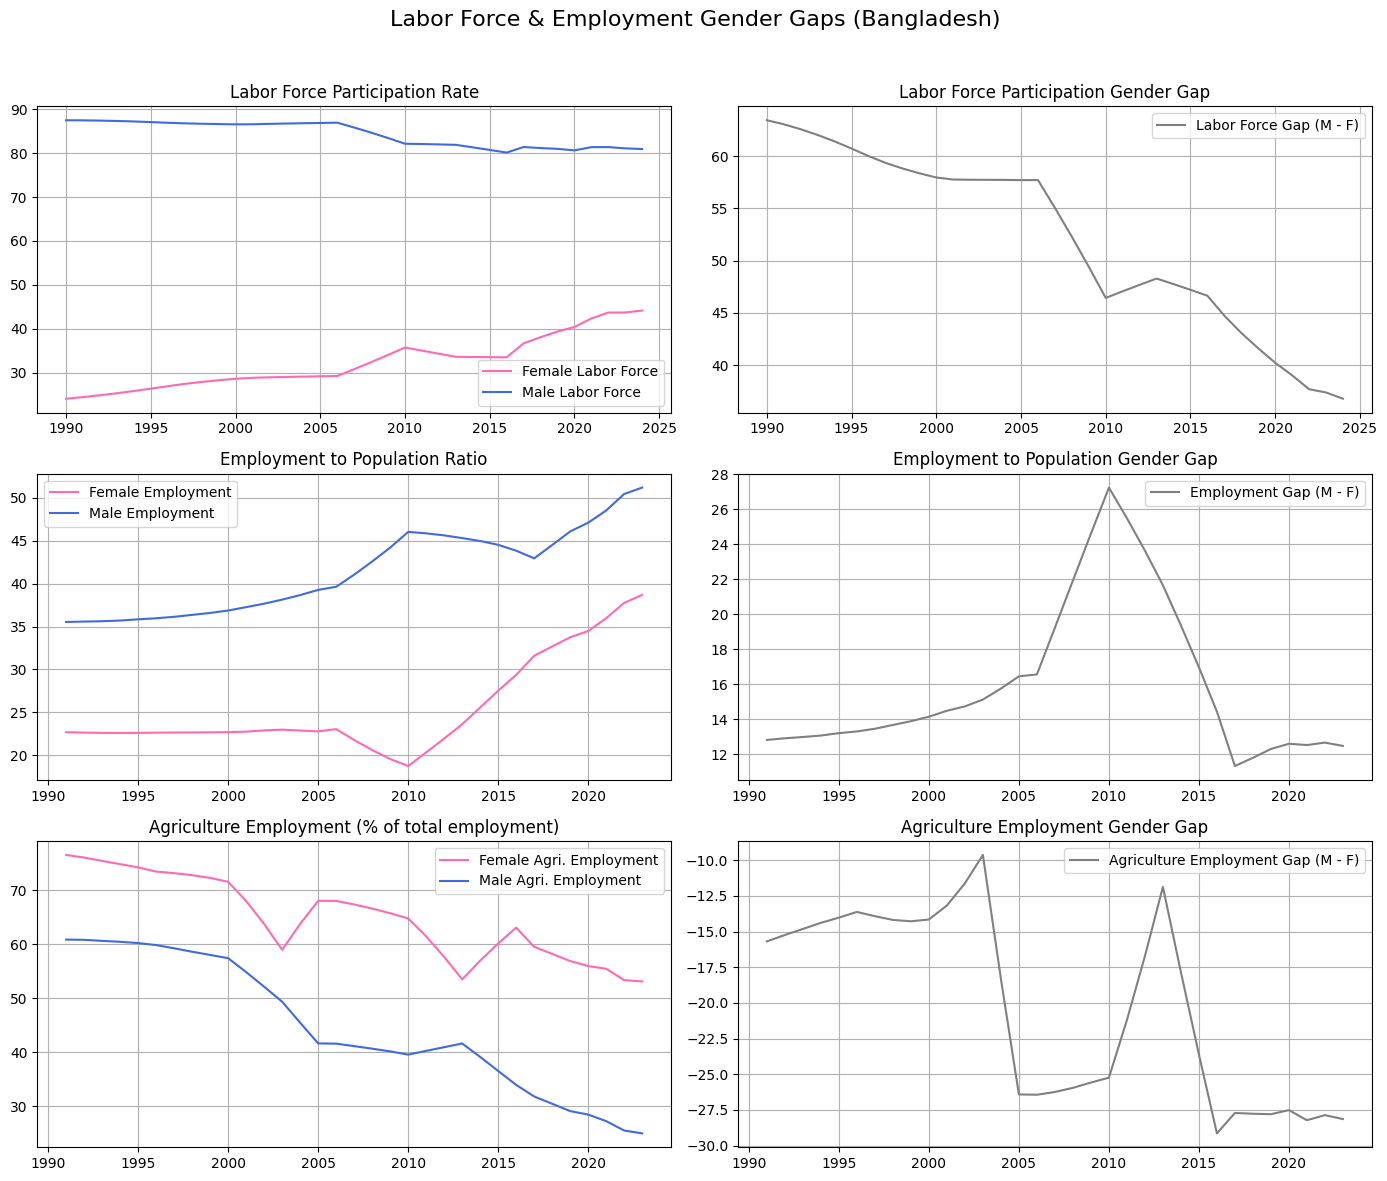

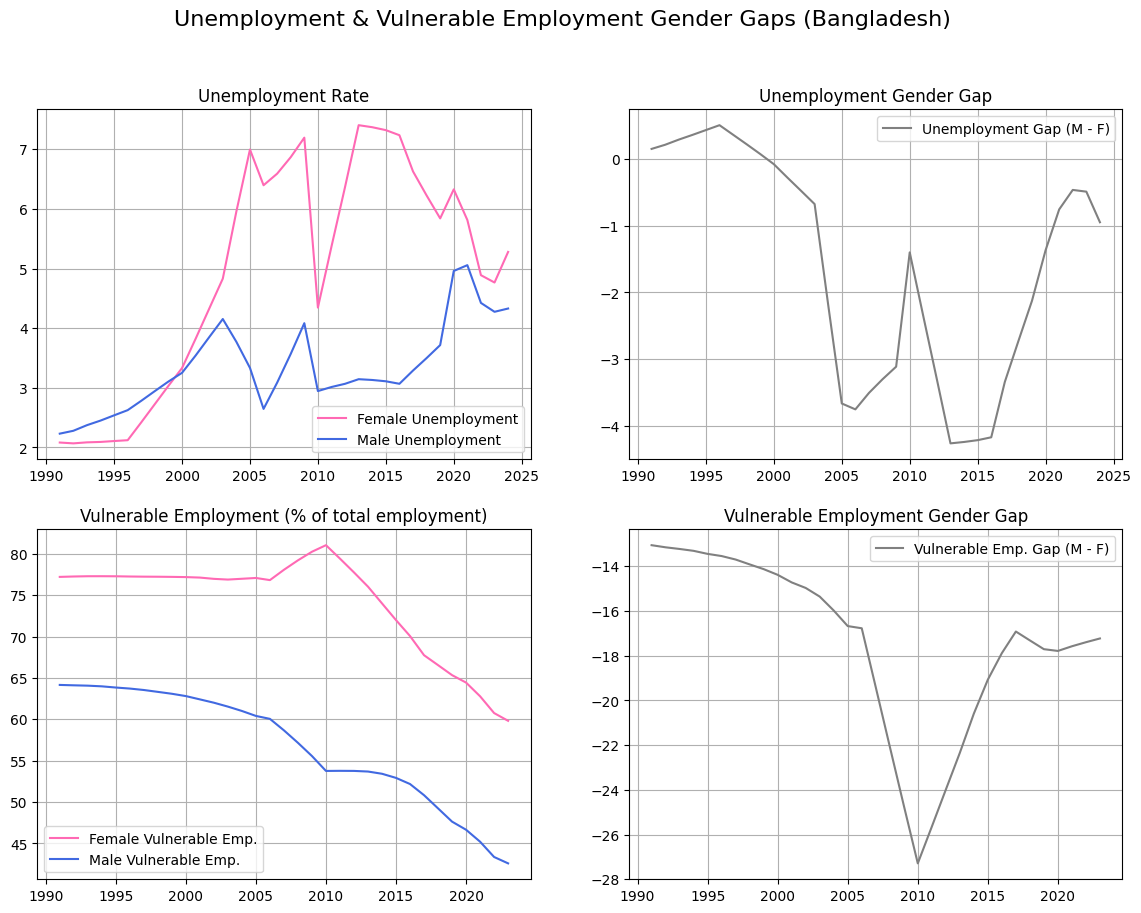

In [ ]:
# ✅ Plot Labor Force and Employment Gender Gaps
if not df_pivot.empty and (
    ("SL.TLF.CACT.FE.ZS" in df_pivot.columns and "SL.TLF.CACT.MA.ZS" in df_pivot.columns) or
    ("SL.EMP.WORK.FE.ZS" in df_pivot.columns and "SL.EMP.WORK.MA.ZS" in df_pivot.columns) or
    ("SL.AGR.EMPL.FE.ZS" in df_pivot.columns and "SL.AGR.EMPL.MA.ZS" in df_pivot.columns) or
    ("SL.UEM.TOTL.FE.ZS" in df_pivot.columns and "SL.UEM.TOTL.MA.ZS" in df_pivot.columns)
    or ("SL.EMP.VULN.FE.ZS" in df_pivot.columns and "SL.EMP.VULN.MA.ZS" in df_pivot.columns)
):
    fig_labor, axs_labor = plt.subplots(3, 2, figsize=(14, 12))
    fig_labor.suptitle("Labor Force & Employment Gender Gaps (Bangladesh)", fontsize=16)

    # Labor Force Participation
    if "SL.TLF.CACT.FE.ZS" in df_pivot.columns and "SL.TLF.CACT.MA.ZS" in df_pivot.columns:
        axs_labor[0, 0].plot(df_pivot.index, df_pivot["SL.TLF.CACT.FE.ZS"], label="Female Labor Force", color="hotpink")
        axs_labor[0, 0].plot(df_pivot.index, df_pivot["SL.TLF.CACT.MA.ZS"], label="Male Labor Force", color="royalblue")
        axs_labor[0, 0].set_title("Labor Force Participation Rate")
        axs_labor[0, 0].legend()
        axs_labor[0, 0].grid(True)
        if "labor_gap" in df_pivot.columns:
            axs_labor[0, 1].plot(df_pivot.index, df_pivot["labor_gap"], label="Labor Force Gap (M - F)", color="gray")
            axs_labor[0, 1].set_title("Labor Force Participation Gender Gap")
            axs_labor[0, 1].legend()
            axs_labor[0, 1].grid(True)

    # Employment to Population
    if "SL.EMP.WORK.FE.ZS" in df_pivot.columns and "SL.EMP.WORK.MA.ZS" in df_pivot.columns:
        axs_labor[1, 0].plot(df_pivot.index, df_pivot["SL.EMP.WORK.FE.ZS"], label="Female Employment", color="hotpink")
        axs_labor[1, 0].plot(df_pivot.index, df_pivot["SL.EMP.WORK.MA.ZS"], label="Male Employment", color="royalblue")
        axs_labor[1, 0].set_title("Employment to Population Ratio")
        axs_labor[1, 0].legend()
        axs_labor[1, 0].grid(True)
        if "employment_gap" in df_pivot.columns:
            axs_labor[1, 1].plot(df_pivot.index, df_pivot["employment_gap"], label="Employment Gap (M - F)", color="gray")
            axs_labor[1, 1].set_title("Employment to Population Gender Gap")
            axs_labor[1, 1].legend()
            axs_labor[1, 1].grid(True)

    # Agriculture Employment
    if "SL.AGR.EMPL.FE.ZS" in df_pivot.columns and "SL.AGR.EMPL.MA.ZS" in df_pivot.columns:
        axs_labor[2, 0].plot(df_pivot.index, df_pivot["SL.AGR.EMPL.FE.ZS"], label="Female Agri. Employment", color="hotpink")
        axs_labor[2, 0].plot(df_pivot.index, df_pivot["SL.AGR.EMPL.MA.ZS"], label="Male Agri. Employment", color="royalblue")
        axs_labor[2, 0].set_title("Agriculture Employment (% of total employment)")
        axs_labor[2, 0].legend()
        axs_labor[2, 0].grid(True)
        if "agri_gap" in df_pivot.columns:
            axs_labor[2, 1].plot(df_pivot.index, df_pivot["agri_gap"], label="Agriculture Employment Gap (M - F)", color="gray")
            axs_labor[2, 1].set_title("Agriculture Employment Gender Gap")
            axs_labor[2, 1].legend()
            axs_labor[2, 1].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])

    fig_unemp_vuln, axs_unemp_vuln = plt.subplots(2, 2, figsize=(14, 10))
    fig_unemp_vuln.suptitle("Unemployment & Vulnerable Employment Gender Gaps (Bangladesh)", fontsize=16)

    # Unemployment
    if "SL.UEM.TOTL.FE.ZS" in df_pivot.columns and "SL.UEM.TOTL.MA.ZS" in df_pivot.columns:
        axs_unemp_vuln[0, 0].plot(df_pivot.index, df_pivot["SL.UEM.TOTL.FE.ZS"], label="Female Unemployment", color="hotpink")
        axs_unemp_vuln[0, 0].plot(df_pivot.index, df_pivot["SL.UEM.TOTL.MA.ZS"], label="Male Unemployment", color="royalblue")
        axs_unemp_vuln[0, 0].set_title("Unemployment Rate")
        axs_unemp_vuln[0, 0].legend()
        axs_unemp_vuln[0, 0].grid(True)
        if "unemployment_gap" in df_pivot.columns:
            axs_unemp_vuln[0, 1].plot(df_pivot.index, df_pivot["unemployment_gap"], label="Unemployment Gap (M - F)", color="gray")
            axs_unemp_vuln[0, 1].set_title("Unemployment Gender Gap")
            axs_unemp_vuln[0, 1].legend()
            axs_unemp_vuln[0, 1].grid(True)

    # Vulnerable Employment
    if "SL.EMP.VULN.FE.ZS" in df_pivot.columns and "SL.EMP.VULN.MA.ZS" in df_pivot.columns:
        axs_unemp_vuln[1, 0].plot(df_pivot.index, df_pivot["SL.EMP.VULN.FE.ZS"], label="Female Vulnerable Emp.", color="hotpink")
        axs_unemp_vuln[1, 0].plot(df_pivot.index, df_pivot["SL.EMP.VULN.MA.ZS"], label="Male Vulnerable Emp.", color="royalblue")
        axs_unemp_vuln[1, 0].set_title("Vulnerable Employment (% of total employment)")
        axs_unemp_vuln[1, 0].legend()
        axs_unemp_vuln[1, 0].grid(True)
        if "vulnerable_employment_gap" in df_pivot.columns:
            axs_unemp_vuln[1, 1].plot(df_pivot.index, df_pivot["vulnerable_employment_gap"], label="Vulnerable Emp. Gap (M - F)", color="gray")
            axs_unemp_vuln[1, 1].set_title("Vulnerable Employment Gender Gap")
            axs_unemp_vuln[1, 1].legend()
            axs_unemp_vuln[1, 1].grid(True)

    fig_labor.show()
    fig_unemp_vuln.show()

## 👷 Labor Force and Employment: A Gender Perspective in Bangladesh

These charts offer insight into how men and women participate in the workforce and find employment over time in Bangladesh.

### 📈 Labor Force Participation Rate
- Men’s participation has consistently been much higher than women’s since 1990.
- Men's rate stayed fairly stable between 80–90%.
- Women’s participation has increased, especially from the mid-2000s.
- The gender gap (Male - Female) is large, though narrowing slowly as more women enter the workforce.

### 💼 Employment to Population Ratio
- Men have had higher employment rates throughout the observed years.
- Women’s employment has gradually risen, notably after the mid-2000s.
- The gender employment gap widened around 2010, but has narrowed in recent years.

### 🌾 Agriculture Employment (% of Total Employment)
- In the 1990s, a larger share of working women were in agriculture compared to men.
- Around the mid-2000s, this trend flipped — more men began working in agriculture as a proportion of total employment.
- Both men and women have shifted away from agriculture toward other sectors.
- The gender gap here has fluctuated — starting negative, turning positive, and then varying over time.

---

### ✅ Summary
Bangladesh’s labor and employment data show clear gender differences:
- Men consistently lead in labor force participation and employment rates.
- Women’s involvement has grown, but the gap is still significant.
- In agriculture, women once had higher proportional employment, but that has changed.
  
These patterns suggest ongoing progress for women in the workforce, but also highlight that **gender disparities remain**, especially in overall employment and labor force activity. The shift away from agriculture reflects broader changes in the country’s economy and labor market.


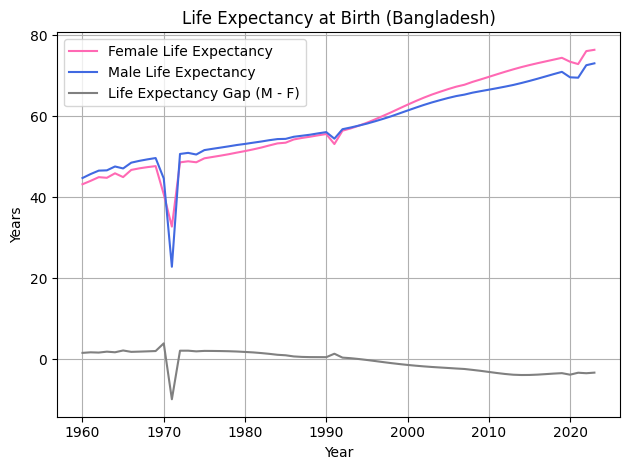

In [ ]:
# ✅ Plot Life Expectancy
if not df_pivot.empty and ("SP.DYN.LE00.FE.IN" in df_pivot.columns and "SP.DYN.LE00.MA.IN" in df_pivot.columns):
    plt.figure()
    plt.plot(df_pivot.index, df_pivot["SP.DYN.LE00.FE.IN"], label="Female Life Expectancy", color="hotpink")
    plt.plot(df_pivot.index, df_pivot["SP.DYN.LE00.MA.IN"], label="Male Life Expectancy", color="royalblue")
    if "life_expectancy_gap" in df_pivot.columns:
        plt.plot(df_pivot.index, df_pivot["life_expectancy_gap"], label="Life Expectancy Gap (M - F)", color="gray")
    plt.title("Life Expectancy at Birth (Bangladesh)")
    plt.xlabel("Year")
    plt.ylabel("Years")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

## 🧬 Life Expectancy Trends and Gender in Bangladesh

This graph shows how long a newborn in Bangladesh is expected to live on average and compares this between men and women over time.

### 📊 General Trend
- Life expectancy has risen steadily for both genders from around 1960 to the present.
- This reflects major improvements in health care, nutrition, and living standards.

### 👩‍⚕️ Female vs. Male Life Expectancy
- Women consistently live longer than men in Bangladesh.
- The female life expectancy line stays above the male line throughout the timeline.
- This pattern is common worldwide and reflects both biological and lifestyle differences.

### 📉 Life Expectancy Gap
- The gap (Male - Female) is mostly negative, showing that men have shorter life spans on average.
- A dip in life expectancy during the early 1970s may be tied to historical crises.
- Despite fluctuations, the gender gap has remained fairly stable in recent years, with women expected to live a few years longer than men.

---

### ✅ Summary
Life expectancy in Bangladesh has increased for both women and men since the 1960s.  
Women have consistently had an advantage, living longer on average than men.  
This gap has varied in size but remains a stable feature of the country’s demographic trend.  
The reasons likely include **biological resilience, lifestyle choices, and different levels of exposure to risks and healthcare access**.


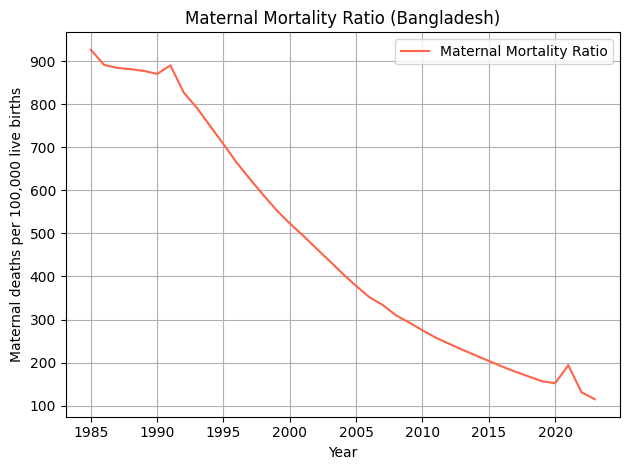

In [ ]:
# ✅ Plot Maternal Mortality Ratio
if not df_pivot.empty and "SH.STA.MMRT" in df_pivot.columns:
    plt.figure()
    plt.plot(df_pivot.index, df_pivot["SH.STA.MMRT"], label="Maternal Mortality Ratio", color="tomato")
    plt.title("Maternal Mortality Ratio (Bangladesh)")
    plt.xlabel("Year")
    plt.ylabel("Maternal deaths per 100,000 live births")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

## 🤰 Trends in Maternal Mortality in Bangladesh

This graph shows how maternal deaths per 100,000 live births have changed in Bangladesh since around 1985.  
Maternal mortality is a key measure of women's health and the quality of healthcare systems.

### 📉 Major Decline Over Time
- In the late 1980s, maternal mortality was very high — over 900 deaths per 100,000 live births.
- From that point, the rate declined sharply and steadily.
- By around 2020, the ratio dropped below 200 — a major improvement in maternal health and safety.

### ⚠️ Temporary Fluctuation
- There is a brief spike in maternal mortality around 2020.
- This could be due to temporary factors like a health crisis or data collection changes.
- After that, the rate resumes its decline.

---

### ✅ Summary
Maternal mortality in Bangladesh has **fallen dramatically** over the past few decades.  
This reflects **better healthcare services, safer childbirth practices, and improved access to maternal care**.  
While there's a recent bump that might need further investigation, the long-term trend shows strong progress and a much safer environment for mothers.
